In [1]:
import env
import os
import seaborn as sns
import matplotlib.pyplot as plt
import acquire
import prepare
import pandas as pd
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")


# In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. 

# Create a pandas dataframe, df_iris, from this data.

In [ ]:
df_iris = sns.load_dataset("iris")

print the first 3 rows

In [ ]:
df_iris.head(3)

print the number of rows and columns (shape)

In [ ]:
df_iris.shape

print the column names

In [ ]:
df_iris.columns

print the data type of each column

In [ ]:
df_iris.info()

print the summary statistics for each of the numeric variables. 

In [ ]:
df_iris.describe()

Would you recommend rescaling the data based on these statistics?

It does not appear rescaling is necessary

# Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel

In [ ]:
df_excel = pd.read_excel('Excel_Exercises.xlsx')

assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = df_excel.head(100)

print the number of rows of your original dataframe

In [ ]:
print('df_excel has',len(df_excel),'rows')

print the first 5 column names

In [ ]:
print(df_excel.columns[0:5].to_list())

print the column names that have a data type of object

In [ ]:
df_excel.select_dtypes(include='object').columns.to_list()

compute the range for each of the numeric variables.

In [ ]:
# create series with only the columns containing numbers, and their minimum/maximum values
mins = df_excel.select_dtypes(include='float64').min()
maxes = df_excel.select_dtypes(include='float64').max()

ranges = pd.concat([mins, maxes], axis=1)
ranges.columns =['min_value', 'max_value']
ranges.insert(2, "Range", ranges.max_value - ranges.min_value , True)
ranges

# Read the data from this google sheet into a dataframe, df_google

print the first three rows

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_import_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_import_url)
df_google.head(3)

Print the number of rows and columns

In [ ]:
df_google.shape

Print the column names

In [ ]:
df_google.columns

Print the datatype of each column

In [ ]:
df_google.info()

print the summary statistics for each of the numeric variables

In [ ]:
df_excel.select_dtypes(include=['int64', 'float64']).describe()

Print the unique values for each of your categorical variables

In [ ]:
df_google.nunique()

In [ ]:
print("Unique values from 'Survived':",df_google['Survived'].unique())
print("Unique values from 'Pclass':",df_google['Pclass'].unique())
print("Unique values from 'Sex':",df_google['Sex'].unique())
print("Unique values from 'Embarked':",df_google['Embarked'].unique())

In [ ]:
# testing data acquisition functions from acquire.py file I created
acquire.get_titanic_data()

In [ ]:
acquire.get_iris_data()

In [ ]:
acquire.get_telco_data()

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

Using the Iris Data:

Use the function defined in acquire.py to load the iris data.

Drop the species_id and measurement_id columns.

Rename the species_name column to just species.

Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
# load the iris data using our function in the acquire file
iris_df = acquire.get_iris_data()

In [ ]:
# verify that it loaded and show the first few lines of data
iris_df.head()

In [ ]:
# Drop the species_id and measurement_id columns
iris_df = iris_df.drop(columns=['species_id','measurement_id'])
iris_df.head()

In [ ]:
# rename the species_name column to species

iris_df.rename(columns = {'species_name':'species'}, inplace = True)
iris_df.head()

In [ ]:
iris_df.species.value_counts()

In [ ]:
# Create dummy variables of the species name    
dummy_df = pd.get_dummies(iris_df['species'], dummy_na=False, drop_first=False)

# concatenate onto the iris dataframe.
iris_df = pd.concat([iris_df, dummy_df], axis=1)
iris_df.head(1)


In [ ]:
# Create a function named prep_iris that accepts the untransformed iris data, 
# and returns the data with the transformations above applied.

def prep_iris(df):
    # Drop the species_id and measurement_id columns
    df = df.drop(columns=['species_id','measurement_id'])
    
    # rename the species_name column to species
    df.rename(columns = {'species_name':'species'}, inplace = True)
    
    # Create dummy variables of the species name    
    dummy_df = pd.get_dummies(df['species'], dummy_na=False, drop_first=False)

    # concatenate onto the iris dataframe.
    df = pd.concat([df, dummy_df], axis=1)
    
    # return the converted iris dataframe
    return df


Using the Titanic dataset

Use the function defined in acquire.py to load the Titanic data.

Drop any unnecessary, unhelpful, or duplicated columns.

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [ ]:
df = acquire.get_titanic_data()

In [ ]:
df.head()

In [ ]:
# Drop unnecessary columns (pclass)
df = df.drop(columns=['pclass'])
df.head()

In [ ]:
# Create dummy variables of the categorical columns   
dummy_df = pd.get_dummies(df[['sex','class','embark_town']], dummy_na=False, drop_first=False)

# concatenate onto the titanic dataframe.
df = pd.concat([df, dummy_df], axis=1)
df.head()

Use the function defined in acquire.py to load the Telco data.

Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
df = acquire.get_telco_data()
df.columns

In [ ]:
# Drop any unnecessary, unhelpful, or duplicated columns. 
df = df.drop(columns=['contract_type_id','internet_service_type_id', 'payment_type_id', 'contract_type_id.1',
                      'payment_type_id.1', 'monthly_charges.1','total_charges.1','paperless_billing.1',])


In [ ]:
# Encode the categorical columns. 
# Create dummy variables of the categorical columns and concatenate them onto the dataframe.

# Create dummy variables of the categorical columns  
dummy_df = pd.get_dummies(df[['gender','contract_type','internet_service_type']], dummy_na=False, drop_first=False)

# concatenate onto the telco dataframe.
df = pd.concat([df, dummy_df], axis=1)
df.head()

In [ ]:
# testing functions in prepare.py

In [ ]:
i_df = acquire.get_iris_data()
i_df = prepare.prep_iris(i_df)
i_df.head()

In [ ]:
i_df.to_csv('iris.csv', index=False)

In [ ]:
t_df = acquire.get_titanic_data()
t_df = prepare.prep_titanic(t_df)
t_df.head()

In [ ]:
t_df.to_csv('titanic.csv', index=False)

In [ ]:
tel_df = acquire.get_telco_data()
tel_df = prepare.prep_telco(tel_df)
tel_df.head()

In [ ]:
# created split functions to split telco, iris, and titanic into train, validate, and test data splits

In [ ]:
# acquire iris data
i_df = acquire.get_iris_data()

In [ ]:
# call split function on iris dataframe
target = 'species'
train_iris, validate_iris, test_iris = prepare.my_split(i_df, target)

In [ ]:
# validate shapes of data_sets look correct
train_iris.shape,test_iris.shape,validate_iris.shape

In [ ]:
# acquire telco data
tel_df = acquire.get_telco_data()

In [ ]:
# call split function
target = 'churn'
train_telco, validate_telco, test_telco = prepare.my_split(tel_df, target)

In [ ]:
# validate shapes of data_sets look correct
train_telco.shape, validate_telco.shape, test_telco.shape

In [ ]:
# get titanic data
tit_df = acquire.get_titanic_data()

In [ ]:
# call split function
target = 'survived'
train_titanic, validate_titanic, test_titanic = prepare.my_split(tit_df, target)

In [ ]:
# validate shapes of data_sets look correct
train_titanic.shape, validate_titanic.shape, test_titanic.shape

# Eploratory Analysis

## Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data.



In [2]:
# acquire using our acquire function
irisdf = acquire.get_iris_data()
irisdf

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...
145,3,146,6.7,3.0,5.2,2.3,virginica
146,3,147,6.3,2.5,5.0,1.9,virginica
147,3,148,6.5,3.0,5.2,2.0,virginica
148,3,149,6.2,3.4,5.4,2.3,virginica


In [3]:
# prepare using our prep function
irisdf = prepare.prep_iris(irisdf)
irisdf

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,1
146,6.3,2.5,5.0,1.9,virginica,0,1
147,6.5,3.0,5.2,2.0,virginica,0,1
148,6.2,3.4,5.4,2.3,virginica,0,1


In [5]:
# split using our split function and validate the size of each dataset
train, validate, test = prepare.my_split(irisdf, target='species')
train.shape, validate.shape, test.shape

((90, 7), (30, 7), (30, 7))

## Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions

In [6]:
# explore our train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 31 to 48
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  90 non-null     float64
 1   sepal_width   90 non-null     float64
 2   petal_length  90 non-null     float64
 3   petal_width   90 non-null     float64
 4   species       90 non-null     object 
 5   versicolor    90 non-null     uint8  
 6   virginica     90 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.4+ KB


In [11]:
train.species.value_counts()

setosa        30
versicolor    30
virginica     30
Name: species, dtype: int64

 - equal distribution of species 
 - petals are longer than they are wide


In [13]:
# split into numerical and categorical variables.  Ignoring species binary columns since they are derived from
# from the target column.  Obviously these would directly correlate with our target value of species
num_vars = ['sepal _length', 'sepal_width', 'petal_length', 'petal_width']
cat_vars = ['species']

# our only categorical variable is the target, species

# For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).


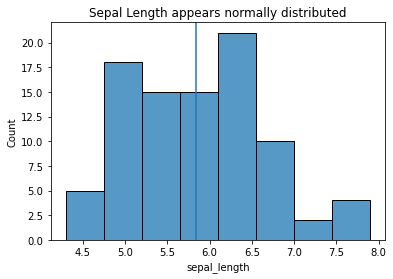

In [27]:
sns.histplot(data=train, x='sepal_length')
plt.title('Sepal Length appears normally distributed')
plt.axvline(train.sepal_length.mean(), label = 'average sepal length')
plt.show()

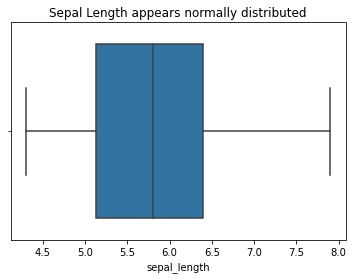

In [28]:
sns.boxplot(x='sepal_length', data=train)
plt.title('Sepal Length appears normally distributed')
plt.show()

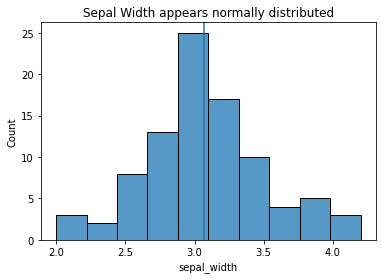

In [25]:
sns.histplot(data=train, x='sepal_width')
plt.title('Sepal Width appears normally distributed')
plt.axvline(train.sepal_width.mean(), label = 'average sepal width')
plt.show()

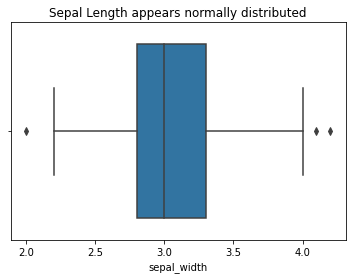

In [29]:
sns.boxplot(x='sepal_width', data=train)
plt.title('Sepal Length appears normally distributed')
plt.show()

10% of data is outliers

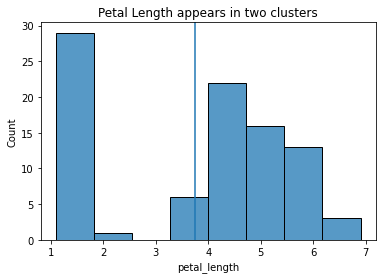

In [31]:
sns.histplot(data=train, x='petal_length')
plt.title('Petal Length appears in two clusters')
plt.axvline(train.petal_length.mean(), label = 'average petal length')
plt.show()

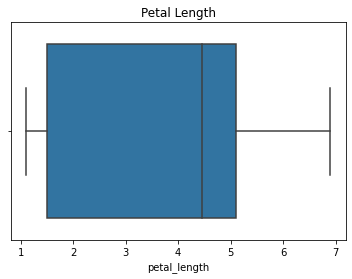

In [33]:
sns.boxplot(x='petal_length', data=train)
plt.title('Petal Length')
plt.show()

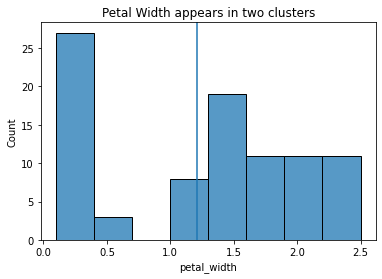

In [34]:
sns.histplot(data=train, x='petal_width')
plt.title('Petal Width appears in two clusters')
plt.axvline(train.petal_width.mean(), label = 'average petal width')
plt.show()

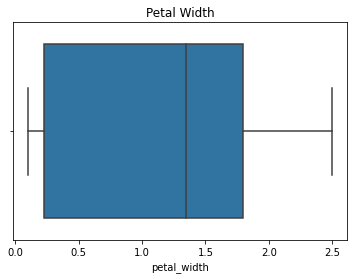

In [35]:
sns.boxplot(x='petal_width', data=train)
plt.title('Petal Width')
plt.show()

- It appears that sepal size is consistant, but petal size has two very discernable size groups

In [40]:
train.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
count,90.000000,90.000000,90.000000,90.000000,90,90.000000,90.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,setosa,NaN,NaN
freq,NaN,NaN,NaN,NaN,30,NaN,NaN
mean,5.841111,3.067778,3.744444,1.206667,NaN,0.333333,0.333333
std,0.798439,0.430006,1.755512,0.787230,NaN,0.474045,0.474045
min,4.300000,2.000000,1.100000,0.100000,NaN,0.000000,0.000000
25%,5.125000,2.800000,1.500000,0.225000,NaN,0.000000,0.000000
50%,5.800000,3.000000,4.450000,1.350000,NaN,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,NaN,1.000000,1.000000


# Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).



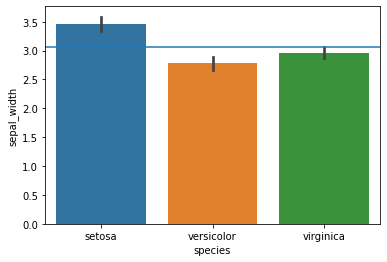

In [41]:
sns.barplot(x='species', y='sepal_width', data=train)
plt.axhline(train.sepal_width.mean(), label = 'average sepal width')
plt.show()

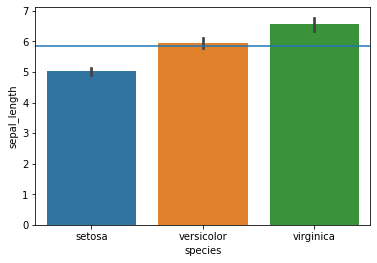

In [42]:
sns.barplot(x='species', y='sepal_length', data=train)
plt.axhline(train.sepal_length.mean(), label = 'average sepal length')
plt.show()

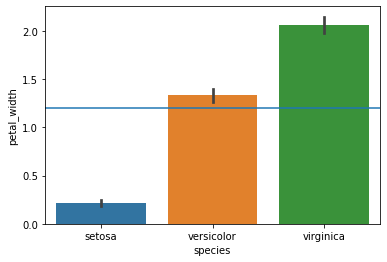

In [43]:
sns.barplot(x='species', y='petal_width', data=train)
plt.axhline(train.petal_width.mean(), label = 'average petal width')
plt.show()

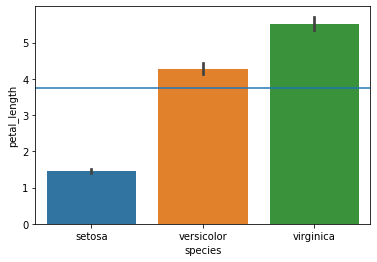

In [44]:
sns.barplot(x='species', y='petal_length', data=train)
plt.axhline(train.petal_length.mean(), label = 'average petal length')
plt.show()

## For each measurement type, compute the descriptive statistics for each species.



In [46]:
train[train.species == 'setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,5.020000,3.460000,1.446667,0.216667,0.0,0.0
std,0.329472,0.350959,0.154771,0.083391,0.0,0.0
min,4.300000,3.000000,1.100000,0.100000,0.0,0.0
25%,4.825000,3.125000,1.400000,0.200000,0.0,0.0
50%,5.000000,3.400000,1.450000,0.200000,0.0,0.0
75%,5.200000,3.700000,1.500000,0.200000,0.0,0.0
max,5.800000,4.200000,1.900000,0.400000,0.0,0.0


In [47]:
train[train.species == 'versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,5.943333,2.776667,4.283333,1.336667,1.0,0.0
std,0.484721,0.325559,0.436351,0.200832,0.0,0.0
min,4.900000,2.000000,3.300000,1.000000,1.0,0.0
25%,5.625000,2.600000,4.000000,1.225000,1.0,0.0
50%,6.000000,2.850000,4.450000,1.350000,1.0,0.0
75%,6.300000,3.000000,4.600000,1.500000,1.0,0.0
max,6.700000,3.400000,5.000000,1.700000,1.0,0.0


In [48]:
train[train.species == 'virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,6.560000,2.966667,5.503333,2.066667,0.0,1.0
std,0.608333,0.284464,0.530116,0.241166,0.0,0.0
min,5.600000,2.500000,4.800000,1.600000,0.0,1.0
25%,6.225000,2.800000,5.100000,1.825000,0.0,1.0
50%,6.400000,3.000000,5.500000,2.050000,0.0,1.0
75%,6.850000,3.100000,5.775000,2.300000,0.0,1.0
max,7.900000,3.800000,6.900000,2.500000,0.0,1.0


## For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [56]:
H0 = 'petal width has no correlation with the versicolor species'
H1 = 'petal width has a correlation with the versicolor species'

alpha = .05
stat, p_value = stats.mannwhitneyu(train.petal_width, train.versicolor)

if p_value < alpha:
    print('We reject the null hypothesis,', H1)
else:
    print('The null hypothesis is confirmed,', H0)

We reject the null hypothesis, petal width has a correlation with the versicolor species


In [57]:
H0 = 'petal length has no correlation with the versicolor species'
H1 = 'petal length has a correlation with the versicolor species'

alpha = .05
stat, p_value = stats.mannwhitneyu(train.petal_length, train.versicolor)

if p_value < alpha:
    print('We reject the null hypothesis,', H1)
else:
    print('The null hypothesis is confirmed,', H0)

We reject the null hypothesis, petal length has a correlation with the versicolor species


In [58]:
H0 = 'sepal width has no correlation with the versicolor species'
H1 = 'sepal width has a correlation with the versicolor species'

alpha = .05
stat, p_value = stats.mannwhitneyu(train.sepal_width, train.versicolor)

if p_value < alpha:
    print('We reject the null hypothesis,', H1)
else:
    print('The null hypothesis is confirmed,', H0)

We reject the null hypothesis, sepal width has a correlation with the versicolor species


In [59]:
H0 = 'sepal length has no correlation with the versicolor species'
H1 = 'sepal length has a correlation with the versicolor species'

alpha = .05
stat, p_value = stats.mannwhitneyu(train.sepal_length, train.versicolor)

if p_value < alpha:
    print('We reject the null hypothesis,', H1)
else:
    print('The null hypothesis is confirmed,', H0)

We reject the null hypothesis, sepal length has a correlation with the versicolor species


In [61]:
H0 = 'petal width has no correlation with the virginica species'
H1 = 'petal width has a correlation with the virginica species'

alpha = .05
stat, p_value = stats.mannwhitneyu(train.petal_width, train.virginica)

if p_value < alpha:
    print('We reject the null hypothesis,', H1)
else:
    print('The null hypothesis is confirmed,', H0)

We reject the null hypothesis, petal width has a correlation with the virginica species


In [60]:
H0 = 'petal length has no correlation with the virginica species'
H1 = 'petal length has a correlation with the virginica species'

alpha = .05
stat, p_value = stats.mannwhitneyu(train.petal_length, train.virginica)

if p_value < alpha:
    print('We reject the null hypothesis,', H1)
else:
    print('The null hypothesis is confirmed,', H0)

We reject the null hypothesis, petal length has a correlation with the virginica species


In [62]:
H0 = 'sepal width has no correlation with the viriginica species'
H1 = 'sepal width has a correlation with the virginica species'

alpha = .05
stat, p_value = stats.mannwhitneyu(train.sepal_width, train.virginica)

if p_value < alpha:
    print('We reject the null hypothesis,', H1)
else:
    print('The null hypothesis is confirmed,', H0)

We reject the null hypothesis, sepal width has a correlation with the virginica species


In [91]:
H0 = 'sepal length has no correlation with the virginica species'
HA = 'sepal length has a correlation with the virginica species'

alpha = .05
stat, p_value = stats.mannwhitneyu(train.sepal_length, train.virginica)

if p_value < alpha:
    print('We reject the null hypothesis,', H1)
else:
    print('The null hypothesis is confirmed,', HA)

We reject the null hypothesis, there is a difference in the sepal area between virginicas and setosas


###  All petal and sepal measurements show correlation with the species

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

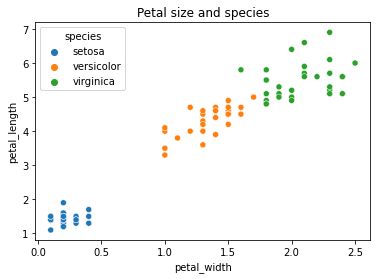

In [38]:
sns.scatterplot(data=train, x='petal_width', y='petal_length', hue='species')
plt.title('Petal size and species')
plt.show()

it appears petal dimensions are grouped by species

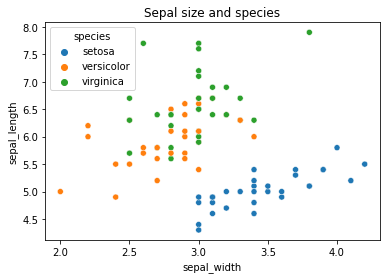

In [39]:
sns.scatterplot(data=train, x='sepal_width', y='sepal_length', hue='species')
plt.title('Sepal size and species')
plt.show()

Sepal size helps distinguish Setosas, but has a less-clear distinction between Versicolor/Virginica

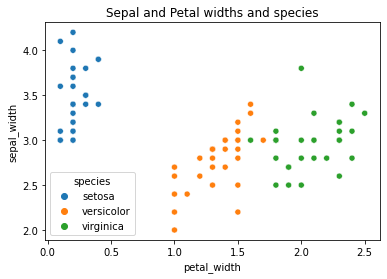

In [65]:
sns.scatterplot(data=train, x='petal_width', y='sepal_width', hue='species')
plt.title('Sepal and Petal widths and species')
plt.show()

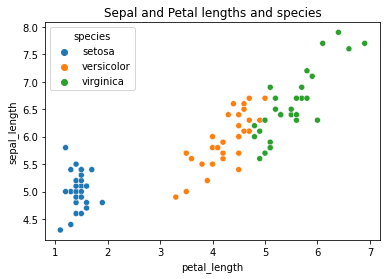

In [66]:
sns.scatterplot(data=train, x='petal_length', y='sepal_length', hue='species')
plt.title('Sepal and Petal lengths and species')
plt.show()

### Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

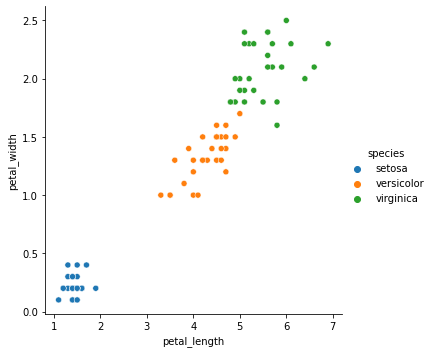

In [67]:
sns.relplot(data=train, x='petal_length', y='petal_width', hue='species')
plt.show()

### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization

In [75]:
temp = train.drop(columns=['versicolor', 'virginica'])
temp = temp.melt(id_vars=['species'], var_name='measurement', value_name='value')

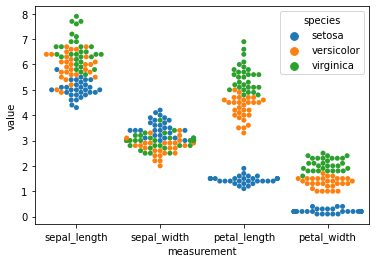

In [78]:
sns.swarmplot(data=temp, x='measurement', y='value', hue='species')
plt.show()

This plot reinforces that petal size is the most distinct way to determine species

### Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [95]:
# create seperate lists of the sepal areas from each species 
virginicas = train[train.species == 'virginica']
setosa = train[train.species == 'setosa']
setosa_sepal_area = setosa.sepal_length * setosa.sepal_width
virginca_seap_area = virginicas.sepal_length * virginicas.sepal_width


In [96]:
# form hypothesis
H0 = 'there is no difference in the sepal area between virginicas and setosas'
Ha = 'there is a difference in the sepal area between virginicas and setosas'

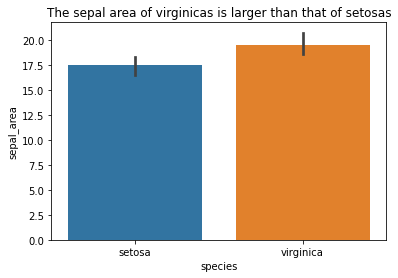

In [109]:
# plot 
v_s = pd.concat([setosa, virginicas], axis=0)
v_s['sepal_area'] = v_s['sepal_width'] * v_s['sepal_length']
v_s

sns.barplot(data=v_s, x='species', y='sepal_area')
plt.title('The sepal area of virginicas is larger than that of setosas')
plt.show()

In [97]:
# find confidence level to determine if variance is True/False
    #H0 variance is equal
    #Ha variance is inqual
stat, p = stats.levene(setosa_sepal_area, virginca_seap_area)
if p > alpha:
    print(p, 'variance is equal')
else:
    print(p, 'variance is inequal')

0.8066029509185157 variance is equal


normality can be assumed because there are 30 of each value

In [98]:
# perform t-test to test hypothesis
t, p = stats.ttest_ind(setosa_sepal_area, virginca_seap_area, equal_var=True)
if p_value < alpha:
    print('We reject the null hypothesis,', Ha)
else:
    print('The null hypothesis is confirmed,', H0)

We reject the null hypothesis, there is a difference in the sepal area between virginicas and setosas


# Part II
## Explore your titanic dataset more completely.



In [2]:
# acquire data using the function in our acquire file
titanicdf = acquire.get_titanic_data()
titanicdf.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [3]:
# prepare file using our prepare function
titanicdf = prepare.prep_titanic(titanicdf)
titanicdf

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,S,Southampton,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,0,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Southampton,1,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,Southampton,0,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Southampton,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Queenstown,0,1,0,0,1,0
886,0,2,male,27.0,0,0,13.0000,S,Southampton,1,0,1,0,0,1
887,1,1,female,19.0,0,0,30.0000,S,Southampton,1,1,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,Cherbourg,1,0,1,1,0,0


In [5]:
# split into train/validate/test using our split function and verify size of returned dataframes
train, validate, test = prepare.my_split(titanicdf, target = 'survived')
train.shape, validate.shape, test.shape

((426, 15), (143, 15), (143, 15))

In [6]:
# Stratification means we'll get even proportions of the target variable in each data set
train.survived.mean(), validate.survived.mean(), test.survived.mean()

(0.40375586854460094, 0.40559440559440557, 0.40559440559440557)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 333 to 84
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 426 non-null    int64  
 1   pclass                   426 non-null    int64  
 2   sex                      426 non-null    object 
 3   age                      426 non-null    float64
 4   sibsp                    426 non-null    int64  
 5   parch                    426 non-null    int64  
 6   fare                     426 non-null    float64
 7   embarked                 426 non-null    object 
 8   embark_town              426 non-null    object 
 9   alone                    426 non-null    int64  
 10  sex_female               426 non-null    uint8  
 11  sex_male                 426 non-null    uint8  
 12  embark_town_Cherbourg    426 non-null    uint8  
 13  embark_town_Queenstown   426 non-null    uint8  
 14  embark_town_Southampton  

In [8]:
train.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
count,426.000000,426.000000,426,426.000000,426.000000,426.000000,426.000000,426,426,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Southampton,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,271,NaN,NaN,NaN,NaN,326,326,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.403756,2.213615,NaN,29.963803,0.521127,0.455399,37.289378,NaN,NaN,0.568075,0.363850,0.636150,0.192488,0.042254,0.765258
std,0.491227,0.858947,NaN,14.212372,0.953396,0.896598,57.107664,NaN,NaN,0.495927,0.481672,0.481672,0.394718,0.201404,0.424336
min,0.000000,1.000000,NaN,0.750000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,NaN,20.000000,0.000000,0.000000,8.050000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,NaN,29.000000,0.000000,0.000000,15.900000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,NaN,39.000000,1.000000,1.000000,37.004200,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000


- most passengers are in 3rd class
- 63% men
- 76% embarked from southampton
- 56% traveling alone
- median fare 15.9, average fare 37
- outlier in fare of 512

In [10]:
num_vars = ['fare']
cat_vars = ['survived', 'pclass', 'sex_male', 'sibsp', 'parch', 'alone',
            'embark_town_Queenstown', 'embark_town_Southampton','embark_town_Cherbourg'
           ]

survived
0    254
1    172
Name: survived, dtype: int64
0    59.624413
1    40.375587
Name: survived, dtype: float64


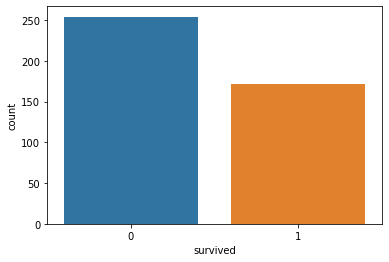

pclass
3    212
1    121
2     93
Name: pclass, dtype: int64
3    49.765258
1    28.403756
2    21.830986
Name: pclass, dtype: float64


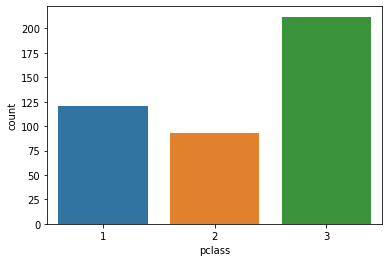

sex_male
1    271
0    155
Name: sex_male, dtype: int64
1    63.615023
0    36.384977
Name: sex_male, dtype: float64


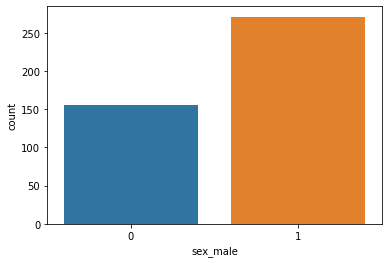

sibsp
0    281
1    108
2     16
4     11
3      6
5      4
Name: sibsp, dtype: int64
0    65.962441
1    25.352113
2     3.755869
4     2.582160
3     1.408451
5     0.938967
Name: sibsp, dtype: float64


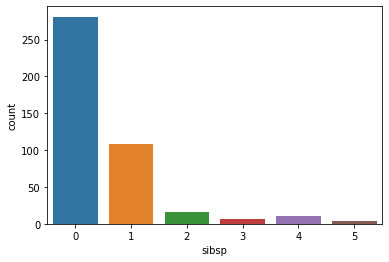

parch
0    310
1     59
2     48
5      4
3      3
6      1
4      1
Name: parch, dtype: int64
0    72.769953
1    13.849765
2    11.267606
5     0.938967
3     0.704225
6     0.234742
4     0.234742
Name: parch, dtype: float64


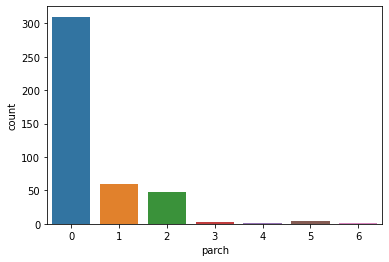

alone
1    242
0    184
Name: alone, dtype: int64
1    56.807512
0    43.192488
Name: alone, dtype: float64


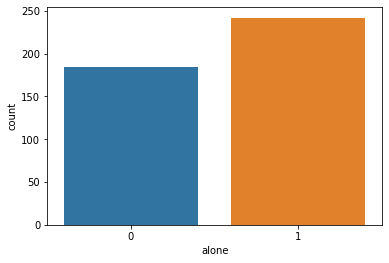

embark_town_Queenstown
0    408
1     18
Name: embark_town_Queenstown, dtype: int64
0    95.774648
1     4.225352
Name: embark_town_Queenstown, dtype: float64


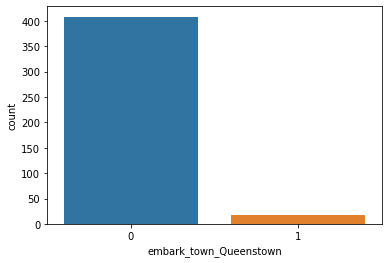

embark_town_Southampton
1    326
0    100
Name: embark_town_Southampton, dtype: int64
1    76.525822
0    23.474178
Name: embark_town_Southampton, dtype: float64


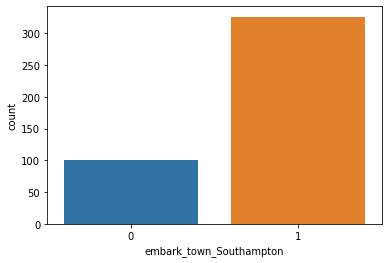

embark_town_Cherbourg
0    344
1     82
Name: embark_town_Cherbourg, dtype: int64
0    80.751174
1    19.248826
Name: embark_town_Cherbourg, dtype: float64


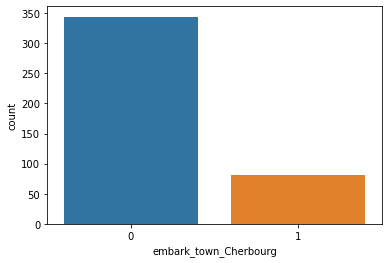

In [11]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

Explore Univariate Numeric Variables

<AxesSubplot:>

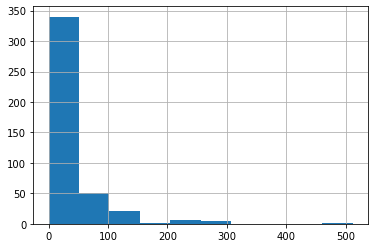

In [13]:
train.fare.hist()

<AxesSubplot:xlabel='fare'>

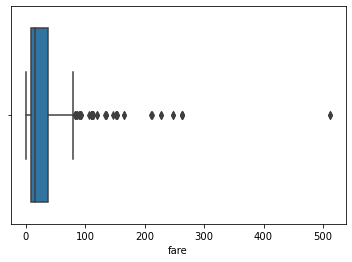

In [14]:
sns.boxplot(x='fare', data=train)

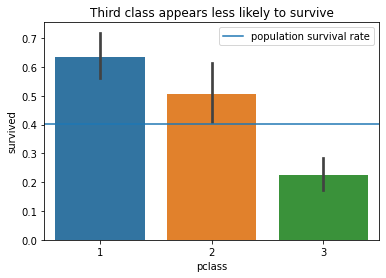

In [15]:
plt.title('Third class appears less likely to survive')
sns.barplot(x='pclass', y='survived', data=train)
pop_survival_rate = train.survived.mean()
plt.axhline(pop_survival_rate, label = 'population survival rate')
plt.legend()
plt.show()


- if we had deck data, we could explore whether this was related to the deck they were on. 
- let's test the relationships of class to survival: chi2 test

In [16]:
alpha = 0.05
null_hyp = "survival and class are independent"
alternative_hyp = "there is a relationship between survival and class"

# set up a crosstab of observed values
observed = pd.crosstab(train.survived, train.pclass)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("reject the null hypothesis that", null_hyp)
    print("there appears to be a relationship between survival and class")
else:
    print("fail to reject the null hypothesis that", null_hyp)

reject the null hypothesis that survival and class are independent
there appears to be a relationship between survival and class


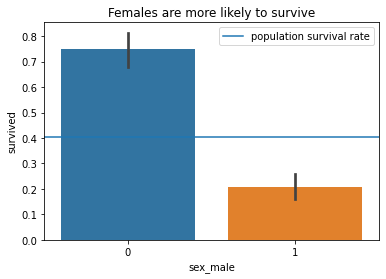

In [18]:
plt.title("Females are more likely to survive")
sns.barplot(x='sex_male', y='survived', data=train)
pop_survival_rate = train.survived.mean()
plt.axhline(pop_survival_rate, label='population survival rate')
plt.legend()
plt.show()

In [19]:
def cat_vis(train, col):
    plt.title('Relationship of survival rate and '+col)
    sns.barplot(x=col, y='survived', data=train)
    survival_rate = train.survived.mean()
    plt.axhline(survival_rate, label='survival rate')
    plt.legend()
    plt.show()
    
    
def cat_test(train, col):
    alpha = 0.05
    null_hyp = col+' and survival rate are independent'
    alt_hyp = 'There is a relationship between survival rate and '+col
    observed = pd.crosstab(train.survived, train[col])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p < alpha:
        print('We reject the null hypothesis that', null_hyp)
        print(alt_hyp)
    else:
        print('We fail to reject the null hypothesis that', null_hyp)
        print('There appears to be no relationship between survival rate and '+col)

def cat_analysis(train, col):
    cat_vis(train, col)
    cat_test(train, col)

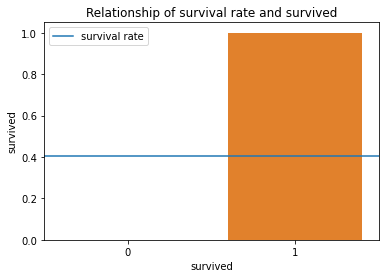

We reject the null hypothesis that survived and survival rate are independent
There is a relationship between survival rate and survived


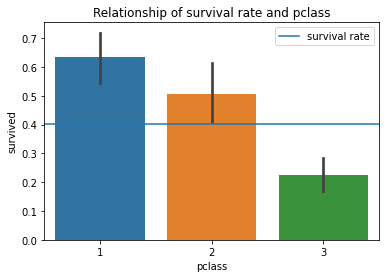

We reject the null hypothesis that pclass and survival rate are independent
There is a relationship between survival rate and pclass


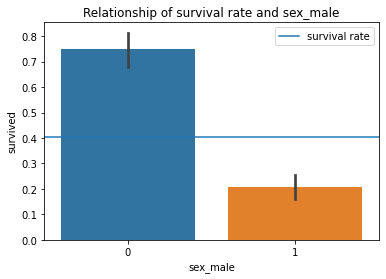

We reject the null hypothesis that sex_male and survival rate are independent
There is a relationship between survival rate and sex_male


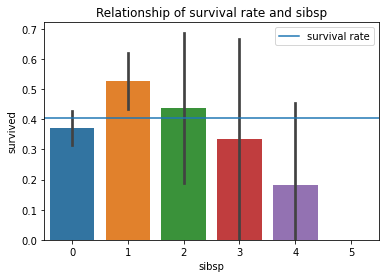

We reject the null hypothesis that sibsp and survival rate are independent
There is a relationship between survival rate and sibsp


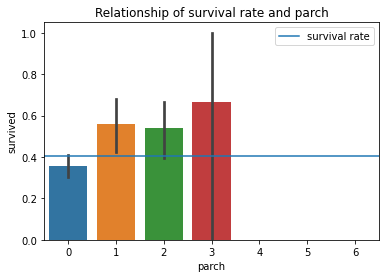

We reject the null hypothesis that parch and survival rate are independent
There is a relationship between survival rate and parch


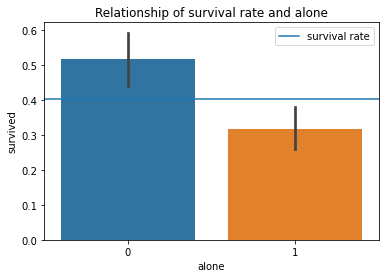

We reject the null hypothesis that alone and survival rate are independent
There is a relationship between survival rate and alone


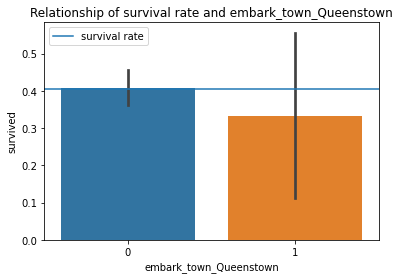

We fail to reject the null hypothesis that embark_town_Queenstown and survival rate are independent
There appears to be no relationship between survival rate and embark_town_Queenstown


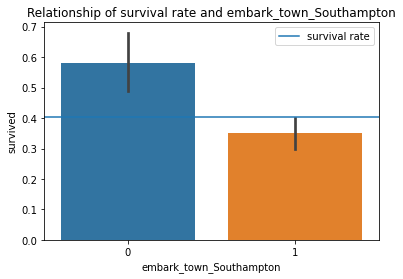

We reject the null hypothesis that embark_town_Southampton and survival rate are independent
There is a relationship between survival rate and embark_town_Southampton


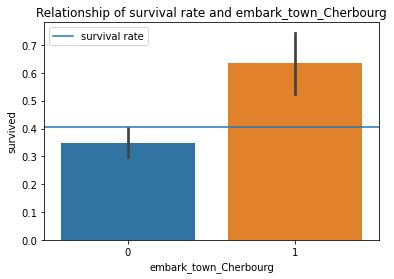

We reject the null hypothesis that embark_town_Cherbourg and survival rate are independent
There is a relationship between survival rate and embark_town_Cherbourg


In [20]:
# cat_analysis(train, 'sex_male')
# cat_test(train, 'sex_male')

for col in cat_vars:
    cat_analysis(train, col)

**Takeaways**

- Embarking from a place other than southampton is more likely to survive. 
- Traveling alone is less likely to survive
- It appears traveling with 3+ have lower survival rate
- Females more likely to survive
- third class less likely to survive

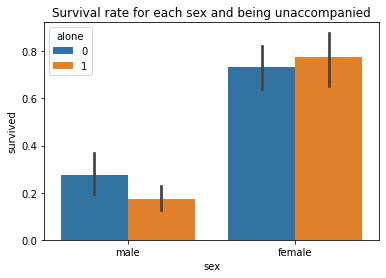

In [25]:
sns.barplot(x='sex', y='survived', hue='alone', data=train)
plt.title('Survival rate for each sex and being unaccompanied')
plt.show()

In [26]:
# Do women with other passengers have a higher survival rate than women traveling alone? 
females = train[train.sex_male == 0]
cat_test(females, 'alone')

We fail to reject the null hypothesis that alone and survival rate are independent
There appears to be no relationship between survival rate and alone
